<h1 align='center'>Gaming Trends and Market Insights</h1>

### Descripción del proyecto

La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. El objetivo es identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

### Instrucciones

**Paso 1. Estudio inicial de los datos**

Ruta de archivo:

*/datasets/games.csv*

**Paso 2. Preparar los datos**

- Reemplazar los nombres de las columnas (colocarlos en minúsculas).
- Convertir los datos en los tipos necesarios.
- Describir las columnas en las que los tipos de datos han sido cambiados y explicar el por qué.
- Si es necesario, elegir la manera de tratar los valores ausentes:
    - Explicar por qué se rellenaron los valores ausentes como se hizo o por qué se decidió dejarlos en blanco.
    - ¿Por qué se cree que los valores están ausentes? Brindar explicaciones posibles.
    - Prestar atención a la abreviatura TBD: significa "to be determined" (a determinar). Especificar cómo se piensa manejar estos casos.
- Calcular las ventas totales (la suma de las ventas en todas las regiones) para cada juego y colocar estos valores en una columna separada.

**Paso 3. Analizar los datos**

- Observar cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
- Analizar cómo varían las ventas de una plataforma a otra. Elegir las plataformas con las mayores ventas totales y construir una distribución basada en los datos de cada año. Buscar las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determinar para qué período deben tomarse los datos. Para hacerlo, se debe revisar las respuestas a las preguntas anteriores. Los datos deberían permitir construir un modelo para 2017.
- Trabajar solo con los datos que se consideran relevantes. Ignorar los datos de años anteriores.
- Identificar qué plataformas son líderes en ventas. ¿Cuáles crecen y cuáles se reducen? Elegir varias plataformas potencialmente rentables.
- Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describir los hallazgos.
- Analizar cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (a elección). Crear un gráfico de dispersión y calcular la correlación entre las reseñas y las ventas. Sacar conclusiones.
- Teniendo en cuenta las conclusiones, comparar las ventas de los mismos juegos en otras plataformas.
- Revisar la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Se pueden generalizar los géneros con ventas altas y bajas?

**Paso 4. Crear un perfil de usuario para cada región**

Para cada región (NA, UE, JP) determinar:

- Las cinco plataformas principales. Describir las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explicar la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

**Paso 5. Probar las siguientes hipótesis:**

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establecer el valor de umbral *alfa*.

Explicar:

— Cómo se formularon las hipótesis nula y alternativa.

— Qué criterio se utilizó para probar las hipótesis y por qué.

**Paso 6. Escribir una conclusión general**


### Diccionario de datos

— *Name* (Nombre)

— *Platform* (Plataforma)

— *Year_of_Release* (Año de lanzamiento)

— *Genre* (Género)

— *NA_sales* (ventas en Norteamérica en millones de dólares estadounidenses)

— *EU_sales* (ventas en Europa en millones de dólares estadounidenses)

— *JP_sales* (ventas en Japón en millones de dólares estadounidenses)

— *Other_sales* (ventas en otros países en millones de dólares estadounidenses)

— *Critic_Score* (máximo de 100)

— *User_Score* (máximo de 10)

— *Rating* (ESRB)


# Contenido <a id='back'></a>

* [Estudio inicial de los datos](#data_review)
* [Preparar los datos](#data_preprocessing)
* [Analizar los datos](#data_analysis)
* [Crear un perfil de usuario para cada región](#user_profile)
* [Prueba de hipótesis](#hypothesis)
* [Conclusión](#end)

## Etapa 1. Estudio inicial de los datos <a id='data_review'></a>

In [1]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Acceso a los registros de los recursos "orders", "products", "aisles", "departments" y "order products"

df_games = pd.read_csv("./datasets/games.csv")

In [3]:
# Obtener información general sobre los registros del DataFrame 'games'

print("\033[1m Muestra aleatoria de filas del DataFrame 'games':")

display(df_games.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'games':\033[0m \n")

df_games.info()

 Muestra aleatoria de filas del DataFrame 'games':


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11583,Resident Evil 6,PS4,2016.0,Shooter,0.06,0.00,0.00,0.01,60.0,6.7,M
2319,LEGO The Lord of the Rings,Wii,2012.0,Action,0.48,0.34,0.00,0.07,NaN,7.2,E10+
9679,Strikers 1945,PS,1998.0,Shooter,0.07,0.05,0.00,0.01,63.0,8.2,E
16663,E.T. The Extra-Terrestrial,GBA,2001.0,Action,0.01,0.00,0.00,0.00,46.0,2.4,E
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
8890,Deadly Premonition,PS3,2010.0,Action,0.08,0.04,0.00,0.02,NaN,NaN,NaN
14504,Max & the Magic Marker,Wii,2011.0,Platform,0.00,0.03,0.00,0.00,NaN,NaN,NaN
14414,Atelier Shallie Plus: Alchemists of the Dusk Sea,PSV,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,T
9144,Pro Evolution Soccer 2015,X360,2014.0,Sports,0.05,0.08,0.00,0.01,NaN,6.8,E
15657,Gon: BakuBakuBakuBaku Adventure,3DS,2012.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


 Resumen del DataFrame 'games': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


[Volver a Contenidos](#back)

### Interpretación inicial de datos <a id='data_review_conclusions'></a>

El archivo CSV contiene 16,715 registros, de los cuales se tiene la siguiente información:

- **Name:** Hay dos valores ausentes en esta columna. Es posible que estos juegos no tengan un nombre registrado o haya habido algún error en la recopilación de datos.

- **Year_of_Release:** Se registran 269 valores ausentes en esta columna. Esto puede deberse a que algunos juegos no tienen un año de lanzamiento registrado en la base de datos.

- **Genre:** Al igual que en el nombre, hay dos valores ausentes en esta columna. Esto podría ser debido a la falta de clasificación de género para algunos juegos.

- **Critic_Score:** Más de la mitad de los datos están ausentes en esta columna, con 8,578 valores faltantes. Esto puede ser atribuible a la falta de calificaciones de críticos para muchos juegos.

- **User_Score:** Esta columna contiene una combinación de valores numéricos y el texto 'tbd' (to be determined). Hay 6,701 valores ausentes, lo cual representa una cantidad considerable. La presencia de 'tbd' puede indicar que la calificación de usuario aún no ha sido determinada o registrada.

- **Rating:** Se observan 9,949 valores ausentes en esta columna. Dado que estamos trabajando con la clasificación de ESRB, estos valores faltantes pueden ser reemplazados por "RP" (Rating Pending).

[Volver a Contenidos](#back)

## Prepara los datos <a id='data_preprocessing'></a>

**Reemplazar los nombres de las columnas**

In [4]:
# Aplicar la función lower() a las columnas del df_games
new_columns_name = []
for column in df_games.columns:
    new_columns_name.append(column.lower())
df_games.columns = new_columns_name
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Convertir los datos en los tipos necesarios.**

In [5]:
# Convertir el tipo de dato de la columna 'year_of_release' de tipo float a tipo int

df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce')

df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

df_games.sample(10, random_state=1245)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8630,F-Zero: GP Legend,GBA,2003,Racing,0.11,0.04,0.00,0.00,77.0,8.5,E
15535,Runaway: A Twist of Fate,DS,<NA>,Adventure,0.00,0.02,0.00,0.00,66.0,NaN,T
14860,Under the Skin,PS2,2004,Action,0.01,0.01,0.00,0.00,55.0,tbd,T
5556,SWAT: Global Strike Team,PS2,2003,Shooter,0.16,0.12,0.00,0.04,69.0,7.8,M
4527,Barbie: Groom and Glam Pups,DS,2010,Action,0.25,0.14,0.00,0.04,NaN,tbd,E
842,Call of Duty 2,X360,2005,Shooter,1.82,0.04,0.01,0.16,89.0,8.1,T
11807,And1 Streetball,XB,2006,Action,0.06,0.02,0.00,0.00,NaN,NaN,NaN
16066,Assetto Corsa,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,6.7,E
16411,Conflict: Denied Ops,PC,2008,Shooter,0.00,0.01,0.00,0.00,58.0,4.8,M
13701,Challenge Me: Maths Workout,DS,2009,Puzzle,0.04,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Convertir el tipo de dato de la columna 'user_score' de tipo string al tipo float

df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')


In [7]:
# Verificación de la conversión de datos

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Describir las columnas en las que los tipos de datos han sido cambiados y explica por qué.**

Se han realizado cambios en dos columnas del conjunto de datos:

- Se cambió la columna 'year_of_release' de float a int para representar mejor el año de lanzamiento de los juegos. Un tipo de dato entero es más simple y eficiente cuando solo se necesita el año de lanzamiento sin detalles adicionales sobre día u hora.

- Se modificó el tipo de dato de la columna 'user_score' de string a float. Este cambio fue necesario para facilitar cálculos numéricos y análisis estadísticos sobre las calificaciones de los usuarios. Los valores 'tbd' tomarán un valor NaN.

**Tratamiento de valores ausentes:**


In [8]:
# Datos ausentes en la columna 'name'

display(df_games[df_games['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# Reemplazar valores ausentes

df_games['name'] = df_games['name'].fillna('Unknown')

print("Valores ausentes en la columna 'name': ", df_games['name'].isna().sum())

Valores ausentes en la columna 'name':  0


In [10]:
# Datos ausentes en la columna 'genre'
display(df_games[df_games['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
# Reemplazar valores ausentes

df_games['genre'] = df_games['genre'].fillna('Unknown')

print("Valores ausentes en la columna 'genre': ", df_games['genre'].isna().sum())

Valores ausentes en la columna 'genre':  0


In [12]:
# Datos ausentes en la columna 'name'
display(df_games[df_games['rating'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# Reemplazar valores ausentes

df_games['rating'] = df_games['rating'].fillna('RP')

print("Valores ausentes en la columna 'rating': ", df_games['rating'].isna().sum())

Valores ausentes en la columna 'rating':  0



Los valores ausentes en las columnas  **name** y **genre** se reemplazan con 'Unknown' para mantener la integridad del conjunto de datos y permitir un análisis continuo sin perder información importante. En la columna **'rating'**, los valores NaN se reemplazan con 'RP' (Rating Pending), conforme a las convenciones de ESRB, indicando que el juego aún no ha sido calificado oficialmente.

Los valores 'TBD' (To Be Determined) se reemplazan con NaN, ya que indican que la calificación de usuario aún está pendiente y no se dispone de información sobre la calificación real.

En cuanto a las columnas **critic_score** y **user_score**, se presentan dos escenarios para manejar los valores ausentes:

El primero implica reemplazar los valores NaN con un valor nulo (0) para indicar la ausencia de una calificación. Sin embargo, esto podría distorsionar el análisis, ya que un valor nulo no refleja necesariamente una calificación baja, sino la falta de datos.

El segundo escenario es mantener los valores NaN sin modificaciones, reflejando la falta de información sobre la calificación. Esto preserva la integridad de los datos y evita introducir sesgos en el análisis.

Por ende, se considera no modificar los valores NaN para garantizar que el análisis no se vea afectado por valores incorrectos incrustados en estos campos.


**Calculo de las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.**

In [14]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4041,Dreamworks Madagascar Kartz,Wii,2009,Racing,0.29,0.15,0.00,0.05,NaN,NaN,E,0.49
16150,Samurai Shodown Anthology (JP sales),PS2,2008,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
9550,Tom Clancy's Splinter Cell: Double Agent,Wii,2006,Action,0.10,0.01,0.00,0.01,61.0,7.4,M,0.12
6853,Mobile Suit Gundam Battlefield Record U.C.0081,PS3,2009,Action,0.00,0.00,0.24,0.00,NaN,NaN,RP,0.24
10309,Rock Band: Metal Track Pack,Wii,2009,Misc,0.10,0.00,0.00,0.01,NaN,NaN,T,0.11


[Volver a Contenidos](#back)

## Analizar los datos <a id='data_analysis'></a>

**Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?**

In [15]:
df_amount_games = df_games.groupby('year_of_release')['name'].count().reset_index().sort_values('name', ascending = False)

df_amount_games.columns = ['year_of_release', 'amount']

df_amount_games

,year_of_release,amount
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136
26,2006,1006
25,2005,939
22,2002,829
23,2003,775
24,2004,762


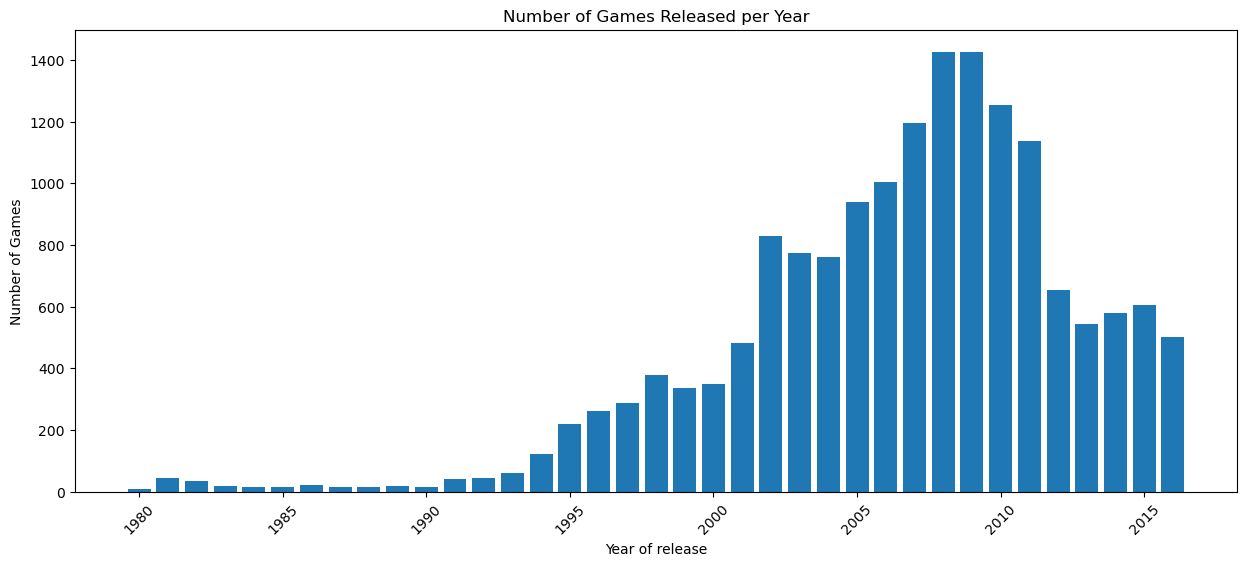

In [16]:
#Crear un gráfico de barras para facilitar una mejor comprensión de las tendencias a lo largo del tiempo.

plt.figure(figsize=(15, 6))
plt.bar(df_amount_games['year_of_release'], df_amount_games['amount'])

plt.xlabel('Year of release')
plt.ylabel('Number of Games')
plt.title('Number of Games Released per Year')
plt.xticks(rotation=45)

plt.show()

Basándonos en los datos proporcionados en el DataFrame, se observa una distribución variada en la cantidad de juegos lanzados cada año, con un pico notable en 2008 (1427 juegos) seguido de una tendencia a la disminución en los años posteriores. Esta tendencia sugiere una distribución de datos sesgada hacia la derecha, lo que indica una asimetría positiva.

**Variación de las ventas de una plataforma a otra. Eligir las plataformas con las mayores ventas totales y construir una distribución basada en los datos de cada año. Buscar las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?**

In [17]:
# Total de ventas por plataforma
platform_total_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

# Plataformas con mayor ganancia en ventas
top_platforms = platform_total_sales.head(5).index.tolist() 
print("Plataformas con mayor ganancia en ventas:")
top_platforms

Plataformas con mayor ganancia en ventas:


['PS2', 'X360', 'PS3', 'Wii', 'DS']

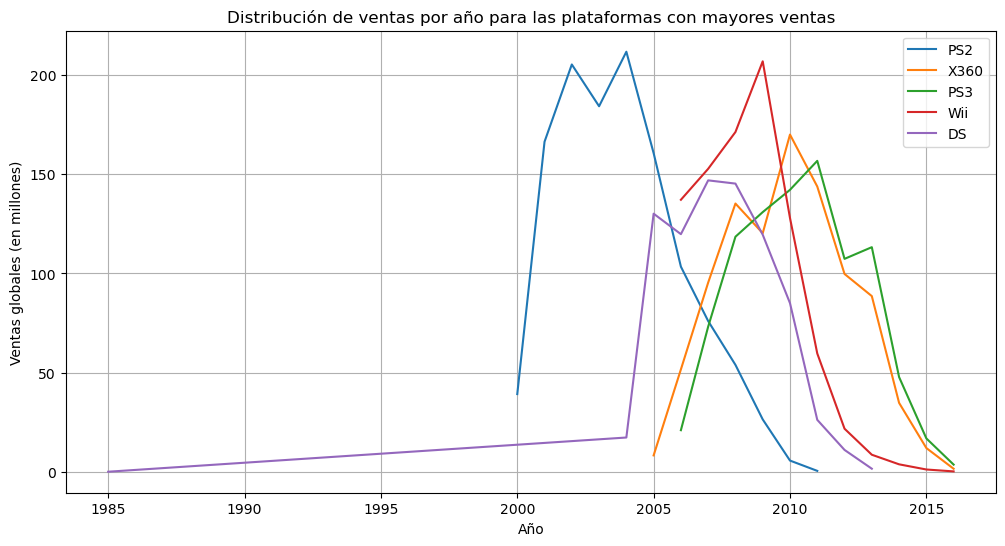

In [18]:
# Distribución del top de plataformas basada en los datos de cada año.

plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_sales = df_games[df_games['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    platform_sales.plot(label=platform)
    
plt.title('Distribución de ventas por año para las plataformas con mayores ventas')
plt.xlabel('Año')
plt.ylabel('Ventas globales (en millones)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Plataformas que solían ser populares pero que ahora no tienen ventas.

# Se agrupan las plataformas por su nombre y por año
platforms_year = df_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Se toman las 15 plataformas con mayor número de ventas (populares)
top_platforms = platform_total_sales.head(15).index.tolist() 


no_sales = []
# Para cada plataforma popular se verificará en la agrupación platforms_year si se tiene registros del 
# año actual (2016). Si no se tiene registros quiere decir que no tuvieron ventas en ese año 
current_year = platforms_year['year_of_release'].max()
for platform in top_platforms:
    result = platforms_year[platforms_year['platform']==platform]
    if result['year_of_release'].max()<current_year:
        no_sales.append(platform)

print("Plataformas que solían ser populares pero que ahora no tienen ventas:")
no_sales


Plataformas que solían ser populares pero que ahora no tienen ventas:


['PS2', 'DS', 'PS', 'GBA', 'PSP', 'XB', 'GB', 'NES', 'N64']

In [20]:
# Paso 4: Determinar el tiempo que tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer

# El valor del año mínimo de cada plataforma indica su año de lanzamiento
year_to_appear = df_games.groupby('platform')['year_of_release'].min().reset_index().sort_values('year_of_release')

# Se segmentan las plataformas por antiguas (antes del 2000) y nuevas (a partir del 2000)
new_platform = year_to_appear[year_to_appear['year_of_release']>=2000]
old_platform = year_to_appear[year_to_appear['year_of_release']<2000]


time = []
# Para cada plataforma nueva se calcula el tiempo que tardan en aparecer
for index, row in new_platform.iterrows():
    appear = row['year_of_release']
    appearance_time = appear - new_platform['year_of_release'].min()
    time.append(appearance_time)

#Promerdio del tiempo que tardan las plataformas en aparecer
print(f"El tiempo en que tardan las plataformas nuevas en aparecer es de {statistics.mean(time)} años")


# El valor del año máximo de cada plataforma indica el año en el que desaparecieron
year_to_appear = df_games.groupby('platform')['year_of_release'].max().reset_index().sort_values('year_of_release')


time = []
# Para cada plataforma vieja se calcula el tiempo que tardan en desaparecer
for index, row in old_platform.iterrows():
    appear = row['year_of_release']
    # Año en que desaparecieron menos el año en que apacecieron
    disappear = year_to_appear[year_to_appear['platform'] == platform]['year_of_release'].iloc[0] - appear 
    time.append(disappear)

print(f"El tiempo en que tardan las plataformas viejas en desaparecer es de {statistics.mean(time)} años")



El tiempo en que tardan las plataformas nuevas en aparecer es de 6 años
El tiempo en que tardan las plataformas viejas en desaparecer es de 10 años


**Determinar para qué período se debe tomar datos. Para hacerlo mirar las respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017**

Para determinar el período apropiado para tomar los datos, es crucial analizar la tendencia histórica de las ventas de videojuegos. Observando la tabla proporcionada, podemos notar que las ventas de videojuegos varían significativamente a lo largo de los años, con un aumento marcado desde principios de la década del 2000 hasta alrededor de 2008, seguido por una tendencia a la baja en los años posteriores. Sin embargo, las ventas parecen estabilizarse hacia finales de la década de 2000 y principios de la de 2010, antes de disminuir nuevamente hacia 2016. Por lo tanto, sería apropiado tomar datos desde al menos 2008 hasta 2016 para construir un modelo predictivo para 2017, ya que este período captura tanto la tendencia ascendente como la posterior disminución en las ventas de videojuegos, proporcionando una base sólida para el análisis y la predicción.

In [21]:
new_df_games = df_games[df_games['year_of_release']>= 2008]

new_df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


**¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elegir varias plataformas potencialmente rentables**

In [22]:
top_sales = new_df_games.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales', ascending = False)

print("Plataformas potencialmente rentables:")
display(top_sales.head(5))

print("Plataformas no rentables:")
display(top_sales.tail(5))

Plataformas potencialmente rentables:


,platform,total_sales
5,PS3,837.19
11,X360,805.96
9,Wii,601.26
2,DS,388.60
6,PS4,314.14


Plataformas no rentables:


,platform,total_sales
4,PS2,86.39
10,WiiU,82.19
8,PSV,53.81
12,XB,0.18
1,DC,0.04


**Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos**

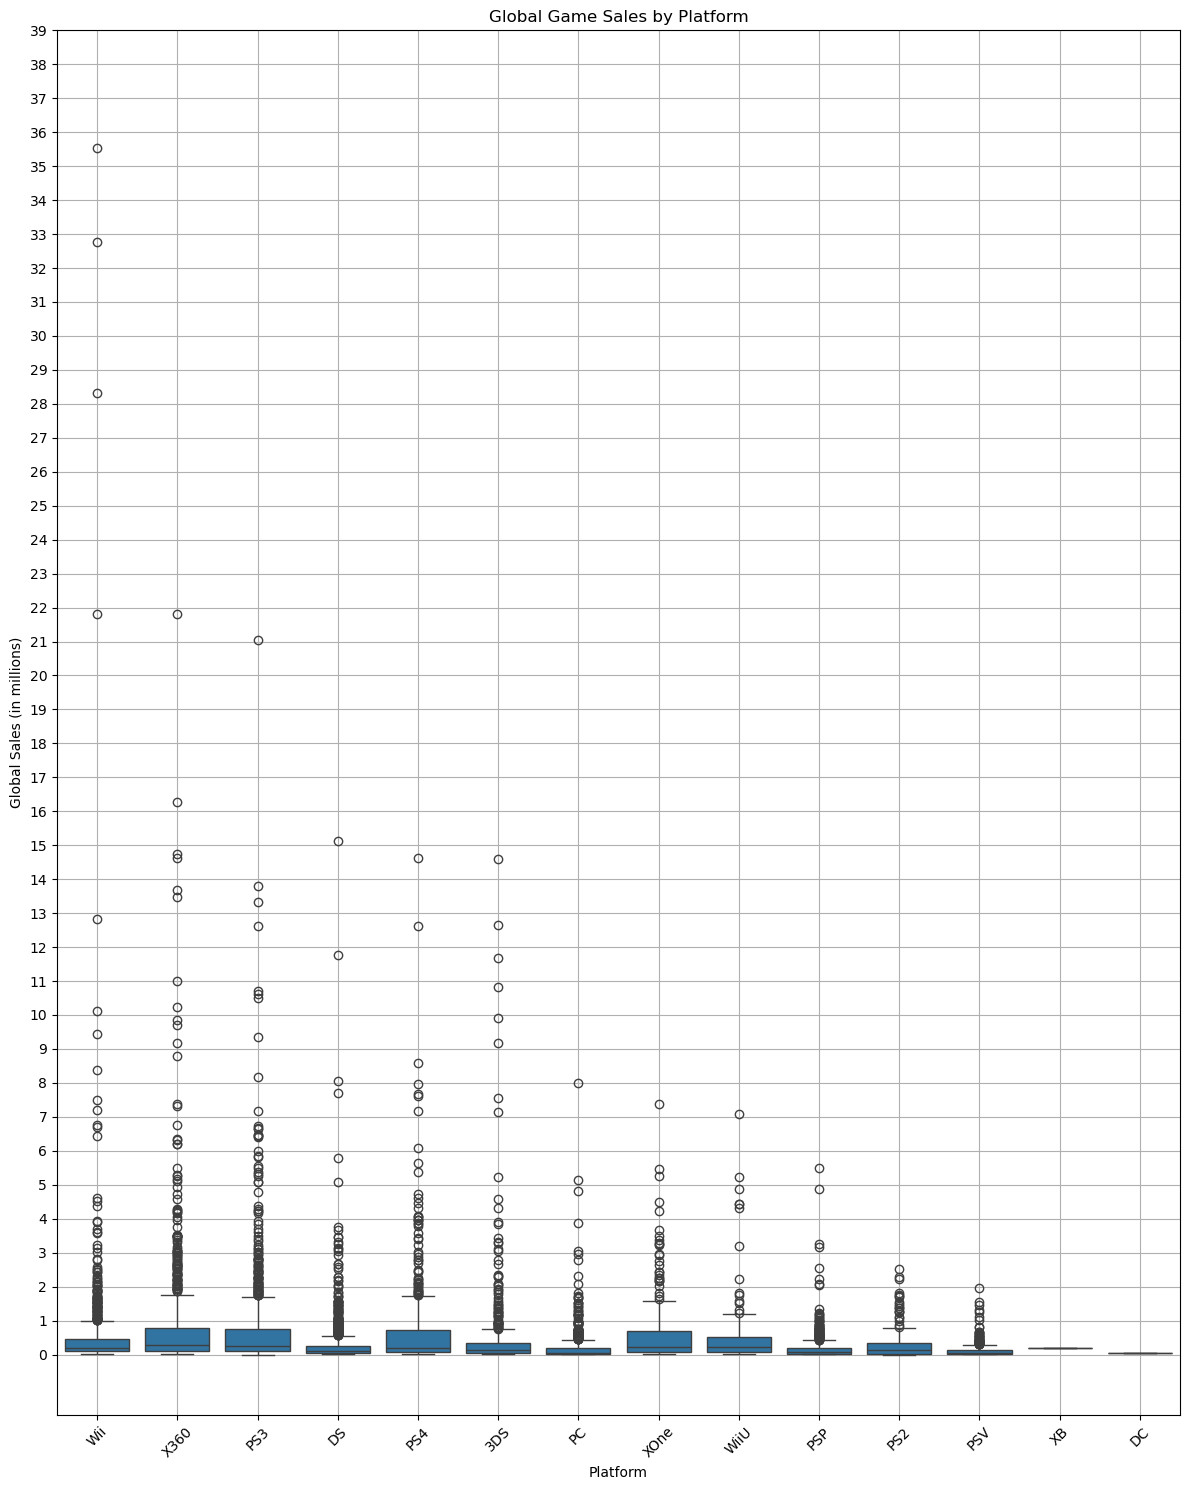

In [23]:
# Crear el diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.
plt.figure(figsize=(12, 15))

sns.boxplot(x='platform', y='total_sales', data=new_df_games)

plt.title('Global Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')

plt.xticks(rotation=45)
plt.yticks(range(0, 40, 1)) 

plt.grid(True)
plt.tight_layout()

plt.show()


Existen diferencias significativas de las ventas entre plataformas. Algunas tienen un rango intercuartil más amplio, lo que indica mayor variabilidad en las ventas. Además, se observan valores atípicos en varias plataformas, lo que sugiere juegos con ventas excepcionalmente altas. Las ventas promedio se encuentran en el rango de cero a un millón de dólares.

**Las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (a elección). Crear un gráfico de dispersión y calcular la correlación entre las reseñas y las ventas**

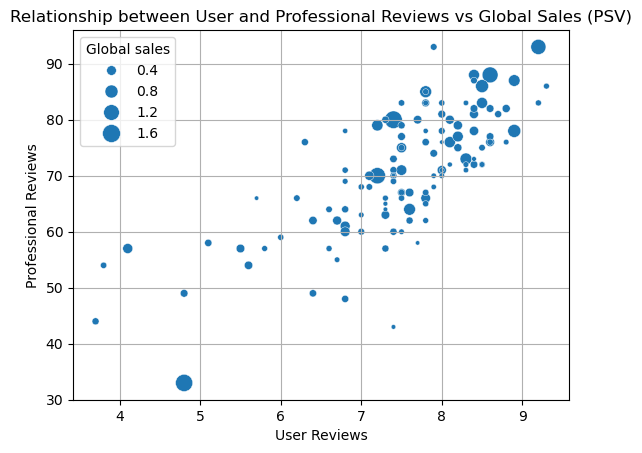

In [24]:
# Obtener los datos de una plataforma a elección

chosen_platform = 'PSV'

df_platform = new_df_games[new_df_games['platform']==chosen_platform]

# Gráfica de dispersión de las reseñas y ventas de la plataforma seleccionada

sns.scatterplot(data=df_platform, x='user_score', y='critic_score', size='total_sales', sizes=(10, 200))

plt.title('Relationship between User and Professional Reviews vs Global Sales (' + chosen_platform + ')')
plt.xlabel('User Reviews')
plt.ylabel('Professional Reviews')
plt.legend(title='Global sales')

plt.grid(True)

plt.show()


La **gráfica de dispersión** muestra la relación entre las **reseñas de usuarios** y las **reseñas profesionales** en comparación con las **ventas globales** para la plataforma **PSV**. Se observa una **correlación positiva** entre las reseñas de usuarios y las ventas globales, así como entre las reseñas profesionales y las ventas globales para la plataforma PSV. A medida que aumentan tanto las reseñas de usuarios como las reseñas profesionales, también aumentan las ventas globales.

**Comparar las ventas de los mismos juegos en otras plataformas**

In [25]:
# Obtener los videojuegos que se han vendido para diferentes plataformas
multiplatform_games = new_df_games[new_df_games['name'].duplicated()]['name'].tolist()

# Recopilar los datos de los videojuegos que están en otras plataformas
sales_multiplatform = new_df_games[new_df_games['name'].isin(multiplatform_games)]

# Mostrar la correlación de las críticas de 5 videojuegos en diferentes plataformas
for game in multiplatform_games[:5]:  # Accede a los primeros 5 juegos directamente desde la lista
    sales = sales_multiplatform[sales_multiplatform['name'] == game]
    correlation = sales[['user_score', 'critic_score', 'total_sales']].corr()
    print("Correlación para", game, "es de:")
    display(correlation)

Correlación para Grand Theft Auto V es de:


,user_score,critic_score,total_sales
user_score,1.000000,0.562500,0.771171
critic_score,0.562500,1.000000,0.706069
total_sales,0.771171,0.706069,1.000000


Correlación para Call of Duty: Black Ops II es de:


,user_score,critic_score,total_sales
user_score,1.000000,0.451616,-0.306246
critic_score,0.451616,1.000000,0.700860
total_sales,-0.306246,0.700860,1.000000


Correlación para Call of Duty: Modern Warfare 3 es de:


,user_score,critic_score,total_sales
user_score,1.000000,0.993431,0.936668
critic_score,0.993431,1.000000,0.941497
total_sales,0.936668,0.941497,1.000000


Correlación para Call of Duty: Black Ops es de:


,user_score,critic_score,total_sales
user_score,1.000000,0.771422,0.907397
critic_score,0.771422,1.000000,0.928325
total_sales,0.907397,0.928325,1.000000


Correlación para Grand Theft Auto V es de:


,user_score,critic_score,total_sales
user_score,1.000000,0.562500,0.771171
critic_score,0.562500,1.000000,0.706069
total_sales,0.771171,0.706069,1.000000


**Distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Se puede generalizar acerca de los géneros con ventas altas y bajas?**

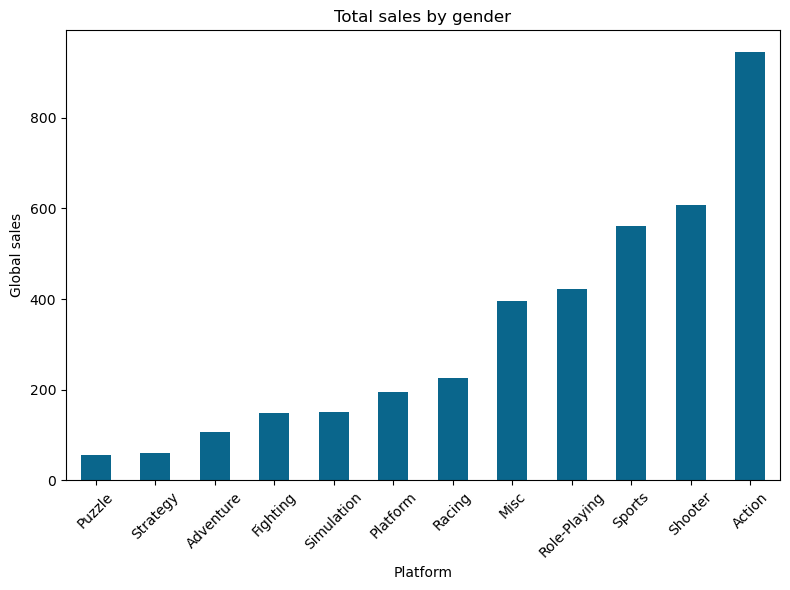

In [26]:
# Agrupar los datos por género y obtener la suma de sus ventas
genre_sales = new_df_games.groupby('genre')['total_sales'].sum().sort_values()

# Crear el gráfico de baras para genre_sales
plt.figure(figsize=(8, 6))
genre_sales.plot(kind='bar', color='#0A668C',
                 xlabel='Platform', ylabel='Global sales', title='Total sales by gender'
                 )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Géneros más rentables:**
Los géneros más rentables son "Action" (Acción) y "Shooter" (Disparos), siendo "Action" el líder en ventas globales, seguido de "Shooter". Estos géneros superan significativamente a otros en términos de ventas globales y tienden a ser los más populares y exitosos.

**Géneros con bajas ventas :**
Los géneros de "Puzzle" y "Strategy" (Estrategia) tienen las ventas más bajas. Estos géneros no son tan populares en comparación con otros, estos tipos de juegos no generan altas ventas en comparación con los géneros de acción y disparos.

[Volver a Contenidos](#back)

## Crear un perfil de usuario para cada región <a id='user_profile'></a>

**Para cada región (NA, UE, JP) determinar:**

***Las cinco plataformas principales. Describir las variaciones en sus cuotas de mercado de una región a otra.***

In [27]:
na_region = new_df_games.groupby('platform')['na_sales'].sum().reset_index().sort_values('na_sales', ascending = False)
na_region.head(5)

,platform,na_sales
11,X360,490.69
5,PS3,349.13
9,Wii,332.87
2,DS,198.73
6,PS4,108.74


In [28]:
eu_region = new_df_games.groupby('platform')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending = False)
eu_region.head(5)

,platform,eu_sales
5,PS3,293.73
11,X360,234.88
9,Wii,170.74
6,PS4,141.09
3,PC,92.17


In [29]:
jp_region = new_df_games.groupby('platform')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending = False)
jp_region.head(5)

,platform,jp_sales
0,3DS,100.62
2,DS,76.12
5,PS3,74.11
7,PSP,60.46
9,Wii,47.01


Las variaciones en las cuotas de mercado entre regiones pueden atribuirse a factores culturales, preferencias de los consumidores, y estrategias de marketing específicas de cada región. Por ejemplo, la popularidad de la consola 3DS en Japón puede reflejar la preferencia por las consolas portátiles y los tipos de juegos populares en ese mercado, mientras que la PS3 y la X360, junto con la PS4, son plataformas de consola más comunes en NA y EU, donde los gustos y preferencias de los jugadores pueden ser diferentes. La presencia de la PC en la lista de las principales plataformas en Europa puede indicar una mayor preferencia por los juegos de PC en esa región en comparación con otras.

**Los cinco géneros principales**

In [30]:
na_region = new_df_games.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales', ascending = False)
na_region.head(5)

,genre,na_sales
0,Action,433.74
8,Shooter,311.26
10,Sports,276.27
3,Misc,211.61
7,Role-Playing,155.81


In [31]:
eu_region = new_df_games.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending = False)
eu_region.head(5)

,genre,eu_sales
0,Action,310.59
8,Shooter,208.35
10,Sports,185.19
3,Misc,107.00
7,Role-Playing,94.46


In [32]:
jp_region = new_df_games.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending = False)
jp_region.head(5)

,genre,jp_sales
7,Role-Playing,138.12
0,Action,90.16
3,Misc,37.33
10,Sports,30.69
1,Adventure,23.36


Los resultados muestran diferencias significativas en los géneros de juegos más populares entre las regiones de NA, EU y JP. En NA, los géneros principales son Acción, Disparos y Deportes, lo que refleja una preferencia por juegos de ritmo rápido y competitivos. En EU, los géneros principales son similares, con Acción, Disparos y Deportes encabezando la lista, lo que indica preferencias similares a las de NA. Sin embargo, en JP, el género principal es el de Rol, seguido por Acción y Misceláneos, lo que sugiere una preferencia por juegos de rol y una variedad de géneros más amplia en comparación con NA y EU. La presencia de juegos de aventuras en JP también resalta la diversidad de preferencias de los jugadores japoneses en comparación con otras regiones. Estas diferencias pueden estar influenciadas por factores culturales, estilos de juego preferidos y tendencias en la industria del entretenimiento en cada región.

**Las clasificaciones de ESRB afectan a las ventas en regiones individuales**

In [33]:
from scipy.stats import f_oneway
sales_by_rating_region = df_games.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).reset_index()

sales_by_rating_region

,rating,na_sales,eu_sales,jp_sales
0,AO,1.26,0.61,0.00
1,E,1292.99,710.25,198.11
2,E10+,353.32,188.52,40.20
3,EC,1.53,0.11,0.00
4,K-A,2.56,0.27,1.46
5,M,748.48,483.97,64.24
6,RP,1242.46,613.91,841.96
7,T,759.75,427.03,151.40


Los resultados muestran que las clasificaciones de ESRB pueden influir en las ventas en diferentes regiones. En América del Norte (NA), las ventas más altas provienen de juegos clasificados como "E" (para todos), seguido de "M" (maduro) y "T" (adolescente). Esto sugiere que los juegos dirigidos a audiencias amplias y maduras son populares en esta región. En Europa (UE), la tendencia es similar, con ventas más altas para juegos clasificados como "M", seguido de "E" y "T". En Japón (JP), la situación es diferente, ya que los juegos clasificados como "RP" (pendiente de clasificación) tienen las ventas más altas, seguidos de "E" y "T". Esto sugiere que las preferencias de los jugadores y las políticas de clasificación pueden variar entre regiones, lo que afecta las ventas de los juegos en función de su clasificación por edades.

[Volver a Contenidos](#back)

## Prueba de hipótesis <a id='hypothesis'></a>

**Prueba de Hipótesis 1:** 

Se busca determinar si hay una diferencia significativa en la calificación promedio de los usuarios entre las plataformas Xbox One y PC.

*Hipótesis Nula (H0):* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

*Hipótesis Alternativa (H1):*  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren.

*Estadístico de prueba:* Se utilizará una prueba t de dos muestras para comparar las calificaciones promedio de los usuarios en las dos plataformas.

*Valor Alfa (α):* Se establece un valor de 0.05 para la significancia estadística.

**Notas:** La prueba t de dos muestras se utiliza para determinar si la diferencia entre las medias de las dos muestras es estadísticamente significativa. El valor alfa (α) representa el nivel de significancia estadística y determina la probabilidad de cometer un error de Tipo I al rechazar incorrectamente la hipótesis nula cuando es verdadera. 

In [34]:
xone_score = new_df_games[new_df_games['platform']=='XOne']['user_score']
pc_score = new_df_games[new_df_games['platform']=='PC']['user_score']

xone_score = xone_score.dropna()
pc_score = pc_score.dropna()

alpha = 0.05
result, pvalue = st.ttest_ind(xone_score, pc_score)

print('Valor p:', pvalue)

if pvalue < alpha:
    print('Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios en las plataformas Xbox One y PC difieren.')
else:
    print('No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios en las plataformas Xbox One y PC son iguales.')
    

Valor p: 0.1295458611061516
No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios en las plataformas Xbox One y PC son iguales.


**Conclusiones:** Los resultados de la prueba de hipótesis sobre la diferencia en la calificación promedio de los usuarios entre las plataformas Xbox One y PC, utilizando el estadístico T de Student, arrojaron un valor p de 0.1295. Este valor es mayor que el nivel de significancia de 0.05, lo que indica que no podemos rechazar la hipótesis nula. Por lo tanto, no hay evidencia suficiente para concluir que existe una diferencia significativa en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC.

**Prueba de Hipótesis 2:** 

Se busca determinar si hay una diferencia significativa en la calificación promedio de los usuarios entre los géneros de Acción y Deportes.

*Hipótesis Nula (H0):* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

*Hipótesis Alternativa (H1):* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes difieren.

*Estadístico de prueba:* Se utilizará una prueba t de dos muestras para comparar las calificaciones promedio de los usuarios en los dos géneros.

*Valor Alfa (α):* Se establece un valor de 0.05 para la significancia estadística.

In [35]:
sport_score = new_df_games[new_df_games['genre']=='Sports']['user_score']
action_score = new_df_games[new_df_games['genre']=='Action']['user_score']

sport_score = sport_score.dropna()
action_score = action_score.dropna()

alpha = 0.05
statistic, pvalue = st.ttest_ind(sport_score, action_score)

print('Valor p:', pvalue)

if pvalue < alpha:
    print('Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes difieren.')
else:
    print('No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.')


Valor p: 1.9150743334561923e-15
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes difieren.


**Conclusiones:** Los resultados de la prueba de hipótesis sobre la diferencia en la calificación promedio de los usuarios entre los géneros de Acción y Deportes, utilizando el estadístico T de Student, arrojaron un valor p de 1.915e-15, indicando que es extremadamente pequeño. Dado que este valor es menor que el nivel de significancia seleccionado (alpha = 0.05), podemos rechazar la hipótesis nula. Por lo tanto, hay evidencia estadística significativa para afirmar que existe una diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.

[Volver a Contenidos](#back)

### Conclusión <a id='end'></a>

En el transcurso del proyecto de análisis de datos en la industria de los videojuegos, se ha explorado diversas facetas del mercado, desde las tendencias de ventas hasta la influencia de factores como las plataformas, géneros y clasificaciones en las calificaciones y ventas. Algunas conclusiones destacadas incluyen:

1. **Tendencias de ventas:** Se observó que las ventas de videojuegos varían significativamente entre regiones, con preferencias distintas en América del Norte, Europa y Japón. Además, ciertas plataformas tienen un dominio más marcado en regiones específicas.

2. **Impacto de las plataformas y géneros:** Se encontró que las plataformas y géneros tienen un impacto significativo en las ventas y calificaciones de los juegos. Por ejemplo, los géneros de acción y disparos tienden a ser más populares y generar mayores ventas, mientras que otros como los juegos de estrategia y rompecabezas tienen un rendimiento más bajo en términos de ventas.

3. **Influencia de las clasificaciones ESRB:** Los datos sugieren que las clasificaciones ESRB pueden tener cierta influencia en las ventas en diferentes regiones, aunque se necesita un análisis más detallado para llegar a conclusiones firmes.

4. **Análisis de hipótesis:** Mediante pruebas de hipótesis, evaluamos si existen diferencias significativas en las calificaciones promedio de los usuarios entre diferentes plataformas y géneros. Los análisis revelaron que, en algunos casos, sí hay diferencias significativas, mientras que en otros no las hay.

Este proyecto ofrece una visión detallada y analítica del mercado de videojuegos, destacando la importancia de factores como las plataformas, géneros y clasificaciones en las ventas y calificaciones de los juegos. Además, subraya la utilidad de las pruebas estadísticas para validar conclusiones y tomar decisiones fundamentadas en el análisis de datos.

[Volver a Contenidos](#back)